In [37]:
import io
import os
import re
import ase
import time
import numpy as np
import pandas as pd
from ase.io.trajectory import Trajectory

import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]


zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
d_thetas = [0.55, 0.6]

# for zeta in zata_all:
#     for ts in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/{}-{}'.format(zeta, ts))
#         print('mkdir fps')
#         print('cd fps')
#         print('cp ../fpParas.dat .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/1000-0.6/fps/run-pyamff.sh .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/1000-0.15/fps/config.ini .')
#         print('bsub < run-pyamff.sh')
#         print('  ')

# for zeta in zata_all:
#     for ts in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/{}-{}/fps'.format(zeta, ts))
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/1-0.1/fps/run-csv-fps.sh .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/1-0.1/fps/get_fpsall.py .')
#         print('bsub < run-csv-fps.sh')
#         print('   ')

In [42]:
# 1.合并一个zata-d_thetas里的所有fps。即对于一个zata-d_thetas，按照img中按照原子index排序，对所有的img生成一个csv。
code_time_s = time.perf_counter()
fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6]
zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

import io
import os
import re
import ase
import time
import numpy as np
import pandas as pd
from ase.io.trajectory import Trajectory

def com_fps(path_csv,img_num=1225):
    
    os.chdir(path_csv)
    df_all_ori = pd.DataFrame()
    df_all_nor = pd.DataFrame()
    
    for i in range(img_num):
        img_i_ori = path_csv + '/Ge_fps_{}_ori.csv'.format(i)
        fps_i_ori = pd.read_csv(img_i_ori)
        fps_i_ori = fps_i_ori.iloc[:,9:]
        df_all_ori = pd.concat([df_all_ori,fps_i_ori],axis=0)
        
        img_i_nor = path_csv + '/Ge_fps_{}_nor.csv'.format(i)
        fps_i_nor = pd.read_csv(img_i_nor)
        fps_i_nor = fps_i_nor.iloc[:,9:]
        df_all_nor = pd.concat([df_all_nor,fps_i_nor],axis=0)
    df_all_nor.to_csv('./fps_all_nor.csv')
    df_all_ori.to_csv('./fps_all_ori.csv')
    print('Finish Write fps_to_csv.')
    return None

# com_fps(path_csv='./fps_csv',img_num=1225)


In [10]:
# fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6]
# zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
# for i in zata_all:
#     for j in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/{}-{}/fps'.format(i, j))
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/data_all/run-comfps.sh .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/1000-0.55/fps/comfps.py .')
#         print('bsub < run-comfps.sh')
#         print('  ')

In [11]:
# fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6]
# zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
# for i in zata_all:
#     for j in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/{}-{}/recal3271'.format(i, j))

#         print('rm 6*')
#         print('  ')

In [12]:
#2.=====合并一个eta,所有drs里的所有fps。即对于一个eta，将所有drs合并，对所有的img生成一个csv。437个=====
import os
import numpy as np
import pandas as pd

fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6]
zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

for e in zata_all:
    print('------------------------eta-{}------------------------'.format(e))
    name_all = []
    df_all = pd.DataFrame()
    for d in d_thetas:
        pa_ = '/work/mse-minzw/lrz/g1/g2/zata_thetas/{}-{}/fps/fps_all_nor.csv'.format(e,d)
        fps_e_di = pd.read_csv(pa_)
        fps_e_di_ = fps_e_di.iloc[:,1:]
        name_num = fps_e_di_.shape[1]
        df_all = pd.concat([df_all,fps_e_di_],axis=1)
        print('Done-{}-{}'.format(e,d))
    df_all.to_csv('./zata-{}-all_fps.csv'.format(e))
    print('Done---------eta = {}'.format(e))
        


------------------------eta-1------------------------


FileNotFoundError: [Errno 2] No such file or directory: '/work/mse-minzw/lrz/g1/g2/zata_thetas/1-0.1/fps/fps_all_nor.csv'

In [36]:
# 3.把g2的数据完善好，标记好index和column
fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
zata_all = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
force_ = pd.read_csv('/Users/renzhe/Desktop/g1/data/atom_all_fall.csv')

# 设置表头
head_ = []
for i in range(len(fps_num)):
    for j in range(fps_num[i]):
        _head_ = 'ts_{}/{}'.format(d_thetas[i],j)
        head_.append(_head_) 
        

for zatai in zata_all:
    datai = pd.read_csv('/Users/renzhe/Desktop/g2/zata_all/zata-{}-all_fps.csv'.format(zatai))
    data_ = datai.iloc[:,1:]
    data_.rename(columns=dict(zip(data_.columns, head_)), inplace=True)
    df_all = pd.concat([force_,data_],axis=1)
    df_all.to_csv('/Users/renzhe/Desktop/g2/zata_all/dataall/zata-{}.csv'.format(zatai),index=None)
    print('Done-{}'.format(zatai))


Done-1
Done-10
Done-50
Done-100
Done-200
Done-400
Done-600
Done-800
Done-1000


In [40]:
# select 1w data
sample_n = 10000
random_state_0 = 1

pwd = '/Users/renzhe/Desktop/g2/zata_all/dataall'
zata_ = 50 
path_ = os.path.join(pwd, 'zata-{}.csv'.format(zata_))
df_all = pd.read_csv(path_)
df1w = df_all.sample(n=sample_n, replace=False, random_state=random_state_0, axis=0)
df1w.to_csv(pwd+'/zata-{}-1w.csv'.format(zata_), index=False)
print('Finish', zata_)

Finish 50


In [61]:
def GBDT_model_feature_importance(random_state_1, 
                                  random_state_2,
                                  n_ks=1000,
                                  pat='/Users/renzhe/Desktop/g2/zata_all/dataall/zata-50-1w.csv'):
    data1w = pd.read_csv(pat)
    x1w = data1w.drop(['Img   |   Atom', 'Force'], axis=1)
    y1w = data1w['Force'].values    
    # nk(eg: 1k)
    datank = data1w.sample(n=n_ks, replace=False, random_state=random_state_1, axis=0)
    xnk = datank.drop(['Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values
    # train-test dataset.
    x_train, x_test, y_train, y_test = train_test_split(xnk, 
                                                        ynk, 
                                                        random_state=random_state_2, 
                                                        train_size=0.99)
    # gbdt-model
    gbr = GradientBoostingRegressor(n_estimators=100, 
                                    max_depth=8, 
                                    min_samples_split=3, 
                                    learning_rate=0.2, 
                                    loss='squared_error')
    # fit model.
    gbr.fit(x_train, y_train.ravel())
    y_gbr = gbr.predict(x_train)
    y_gbr1 = gbr.predict(x_test)
    r2 = r2_score(y_test, y_gbr1)
    mse = mean_squared_error(y_test, y_gbr1)
    rr = np.sqrt(mse)
#     if r2 > 0.8 and rr < 0.15:
    print('  random_state_1 = {}'.format(random_state_1))
    print('  random_state_2 = {}'.format(random_state_2))
    print("  R2:", r2)
    print("  RMSE:", rr)
#         joblib.dump(gbr, '/Users/renzhe/Desktop/g1/data/g1_1_dRs_model/train_model_{}_{}.m'.
#                     format(random_state_1, random_state_2))
    print('Finish random_state_1-2: {}-{}'.format(random_state_1, random_state_2))
#     if r2 > 0.8 and rr < 0.15:
    feature_importance = gbr.feature_importances_
    sorted_id = sorted(range(len(feature_importance)), 
                    key=lambda k: feature_importance[k], 
                    reverse=True)       
    fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
    d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    df1 = pd.DataFrame(columns=xnk.columns, index=d_thetas)
    df1.iloc[0, 0:32] = feature_importance[0:32]
    df1.iloc[1, 32:53] = feature_importance[32:53]
    df1.iloc[2, 53:69] = feature_importance[53:69]
    df1.iloc[3, 69:82] = feature_importance[69:82]
    df1.iloc[4, 82:93] = feature_importance[82:93]
    df1.iloc[5, 93:102] = feature_importance[93:102]
    df1.iloc[6, 102:110] = feature_importance[102:110]
    df1.iloc[7, 110:117] = feature_importance[110:117]
    df1.iloc[8, 117:124] = feature_importance[117:124]
    df1.iloc[9, 124:130] = feature_importance[124:130]
    df1.iloc[10, 130:136] = feature_importance[130:136]        
    df1 = df1.fillna(0)
    plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 2, 1)
    df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
    plt.xlabel('Importance', size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.get_legend().remove()        
    # average feature_importance
    feature_importance = gbr.feature_importances_      
    df1a = pd.DataFrame(columns=['ave'], index=d_thetas)
    df1a.iloc[0, 0] = np.sum(feature_importance[0:32]) / fps_num[0] 
    df1a.iloc[1, 0] = np.sum(feature_importance[32:53]) / fps_num[1]
    df1a.iloc[2, 0] = np.sum(feature_importance[53:69]) / fps_num[2]
    df1a.iloc[3, 0] = np.sum(feature_importance[69:82]) / fps_num[3]
    df1a.iloc[4, 0] = np.sum(feature_importance[82:93]) / fps_num[4]
    df1a.iloc[5, 0] = np.sum(feature_importance[93:102]) / fps_num[5]
    df1a.iloc[6, 0] = np.sum(feature_importance[102:110]) / fps_num[6]
    df1a.iloc[7, 0] = np.sum(feature_importance[110:117]) / fps_num[7]
    df1a.iloc[8, 0] = np.sum(feature_importance[117:124]) / fps_num[8]
    df1a.iloc[9, 0] = np.sum(feature_importance[124:130]) / fps_num[9]
    df1a.iloc[10, 0] = np.sum(feature_importance[130:136]) / fps_num[10]
    plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 2, 1)
    df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
    plt.xlabel('Importance', size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.get_legend().remove()
    return gbr

  random_state_1 = 25
  random_state_2 = 25
  R2: 0.6037940243592221
  RMSE: 0.37268540301963415
Finish random_state_1-2: 25-25


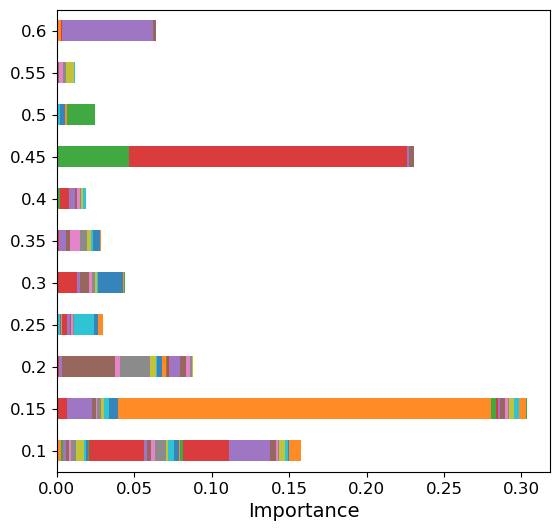

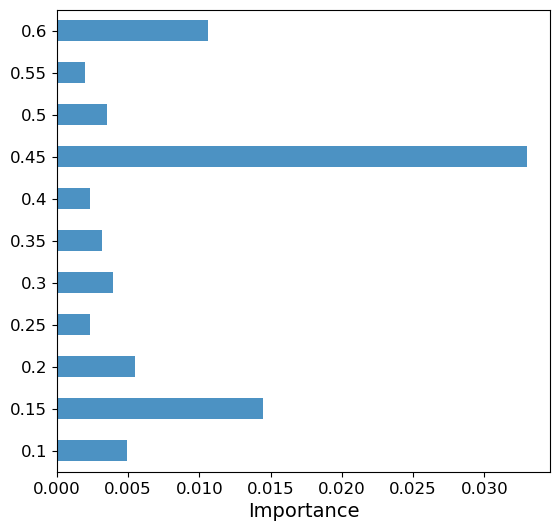

In [112]:
s1 = 25
s2 = s1
gbri = GBDT_model_feature_importance(random_state_1=s1, 
                                     random_state_2=s2)

In [113]:
joblib.dump(gbri, '/Users/renzhe/Desktop/g2/zata_all/model/train_model_{}_{}.m'.
            format(s1, s2))

['/Users/renzhe/Desktop/g2/zata_all/model/train_model_25_25.m']

In [160]:
def top4(list_m):
    l1 = list_m
    sorted_indices = sorted(range(len(l1)), key=lambda i: l1[i], reverse=True)
    top_four_indices = sorted_indices[:4]
    return top_four_indices

def GBDT_model_feature_importanceg2(random_state_1, 
                                    random_state_2,
                                    n_ks=1100,
                                    pat='/Users/renzhe/Desktop/g2/zata_all/dataall/zata-50-1w.csv'):
    data1w = pd.read_csv(pat)
    x1w = data1w.drop(['Img   |   Atom', 'Force'], axis=1)
    y1w = data1w['Force'].values    
    # nk(eg: 1k)
    datank = data1w.sample(n=n_ks, replace=False, random_state=random_state_1, axis=0)
    xnk = datank.drop(['Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values
    # train-test dataset.
    x_train, x_test, y_train, y_test = train_test_split(xnk, 
                                                        ynk, 
                                                        random_state=random_state_2, 
                                                        train_size=0.99)
    # gbdt-model
    gbr = GradientBoostingRegressor(n_estimators=110, 
                                    max_depth=8, 
                                    min_samples_split=3, 
                                    learning_rate=0.2, 
                                    loss='squared_error')
    # fit model.
    gbr.fit(x_train, y_train.ravel())
    feature_importance = gbr.feature_importances_      
    fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
    d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    # average feature_importance
    feature_importance = gbr.feature_importances_      
    im1 = [np.sum(feature_importance[0:32]), 
           np.sum(feature_importance[32:53]),
           np.sum(feature_importance[53:69]),
           np.sum(feature_importance[69:82]),
           np.sum(feature_importance[82:93]),
           np.sum(feature_importance[93:102]),
           np.sum(feature_importance[102:110]),
           np.sum(feature_importance[110:117]),
           np.sum(feature_importance[117:124]),
           np.sum(feature_importance[124:130]),
           np.sum(feature_importance[130:136])]
    im2 = [np.sum(feature_importance[0:32])/ fps_num[0], 
           np.sum(feature_importance[32:53])/ fps_num[1],
           np.sum(feature_importance[53:69])/ fps_num[2],
           np.sum(feature_importance[69:82])/ fps_num[3],
           np.sum(feature_importance[82:93])/ fps_num[4],
           np.sum(feature_importance[93:102])/ fps_num[5],
           np.sum(feature_importance[102:110])/ fps_num[6],
           np.sum(feature_importance[110:117])/ fps_num[7],
           np.sum(feature_importance[117:124])/ fps_num[8],
           np.sum(feature_importance[124:130])/ fps_num[9],
           np.sum(feature_importance[130:136])/ fps_num[10]]
    im1top4 = top4(list_m=im1)
    im2top4 = top4(list_m=im2)
    if (set(im1top4) == set(im2top4)) and (im2top4[0]<=5):
        print("  d_ts:", d_thetas[im2top4[0]])
        joblib.dump(gbr, '/Users/renzhe/Desktop/g2/zata_all/model/train_model_{}_{}_{}.m'.format(random_state_1, random_state_2,d_thetas[im2top4[0]]))
    print('Finish random_state_1-2: {}-{}'.format(random_state_1, random_state_2))
    

In [135]:
top4(list_m=mm1)

[0, 2, 1, 5]

In [161]:
for j in range(1000):
    for i in range(1000):
        GBDT_model_feature_importanceg2(random_state_1=i, 
                                        random_state_2=j)


Finish random_state_1-2: 0-0
Finish random_state_1-2: 1-0
  d_ts: 0.35
Finish random_state_1-2: 2-0
Finish random_state_1-2: 3-0
Finish random_state_1-2: 4-0
Finish random_state_1-2: 5-0
  d_ts: 0.35
Finish random_state_1-2: 6-0
Finish random_state_1-2: 7-0
Finish random_state_1-2: 8-0
Finish random_state_1-2: 9-0
Finish random_state_1-2: 10-0
Finish random_state_1-2: 11-0
Finish random_state_1-2: 12-0
Finish random_state_1-2: 13-0
Finish random_state_1-2: 14-0
Finish random_state_1-2: 15-0
Finish random_state_1-2: 16-0
Finish random_state_1-2: 17-0
  d_ts: 0.15
Finish random_state_1-2: 18-0
Finish random_state_1-2: 19-0
Finish random_state_1-2: 20-0
Finish random_state_1-2: 21-0
Finish random_state_1-2: 22-0
Finish random_state_1-2: 23-0
Finish random_state_1-2: 24-0
Finish random_state_1-2: 25-0
Finish random_state_1-2: 26-0
Finish random_state_1-2: 27-0
  d_ts: 0.1
Finish random_state_1-2: 28-0
Finish random_state_1-2: 29-0
Finish random_state_1-2: 30-0
Finish random_state_1-2: 31-0

Finish random_state_1-2: 256-0
Finish random_state_1-2: 257-0
Finish random_state_1-2: 258-0
Finish random_state_1-2: 259-0
Finish random_state_1-2: 260-0
Finish random_state_1-2: 261-0
  d_ts: 0.15
Finish random_state_1-2: 262-0
Finish random_state_1-2: 263-0
Finish random_state_1-2: 264-0
  d_ts: 0.15
Finish random_state_1-2: 265-0
  d_ts: 0.35
Finish random_state_1-2: 266-0
Finish random_state_1-2: 267-0
Finish random_state_1-2: 268-0
  d_ts: 0.35
Finish random_state_1-2: 269-0
Finish random_state_1-2: 270-0
Finish random_state_1-2: 271-0
Finish random_state_1-2: 272-0
Finish random_state_1-2: 273-0
  d_ts: 0.35
Finish random_state_1-2: 274-0
Finish random_state_1-2: 275-0
Finish random_state_1-2: 276-0
Finish random_state_1-2: 277-0
Finish random_state_1-2: 278-0
Finish random_state_1-2: 279-0
Finish random_state_1-2: 280-0
Finish random_state_1-2: 281-0
Finish random_state_1-2: 282-0
Finish random_state_1-2: 283-0
Finish random_state_1-2: 284-0
Finish random_state_1-2: 285-0
Finis

Finish random_state_1-2: 507-0
Finish random_state_1-2: 508-0
Finish random_state_1-2: 509-0
Finish random_state_1-2: 510-0
  d_ts: 0.35
Finish random_state_1-2: 511-0
Finish random_state_1-2: 512-0
Finish random_state_1-2: 513-0
Finish random_state_1-2: 514-0
Finish random_state_1-2: 515-0
Finish random_state_1-2: 516-0
  d_ts: 0.35
Finish random_state_1-2: 517-0
Finish random_state_1-2: 518-0
  d_ts: 0.35
Finish random_state_1-2: 519-0
Finish random_state_1-2: 520-0
Finish random_state_1-2: 521-0
  d_ts: 0.1
Finish random_state_1-2: 522-0
Finish random_state_1-2: 523-0
Finish random_state_1-2: 524-0
Finish random_state_1-2: 525-0
Finish random_state_1-2: 526-0
Finish random_state_1-2: 527-0
Finish random_state_1-2: 528-0
Finish random_state_1-2: 529-0
Finish random_state_1-2: 530-0
Finish random_state_1-2: 531-0
Finish random_state_1-2: 532-0
Finish random_state_1-2: 533-0
  d_ts: 0.1
Finish random_state_1-2: 534-0
Finish random_state_1-2: 535-0
Finish random_state_1-2: 536-0
  d_ts:

Finish random_state_1-2: 760-0
Finish random_state_1-2: 761-0
Finish random_state_1-2: 762-0
Finish random_state_1-2: 763-0
Finish random_state_1-2: 764-0
Finish random_state_1-2: 765-0
Finish random_state_1-2: 766-0
  d_ts: 0.1
Finish random_state_1-2: 767-0
Finish random_state_1-2: 768-0
Finish random_state_1-2: 769-0
Finish random_state_1-2: 770-0
Finish random_state_1-2: 771-0
Finish random_state_1-2: 772-0
  d_ts: 0.15
Finish random_state_1-2: 773-0
  d_ts: 0.3
Finish random_state_1-2: 774-0
Finish random_state_1-2: 775-0
Finish random_state_1-2: 776-0
Finish random_state_1-2: 777-0
  d_ts: 0.15
Finish random_state_1-2: 778-0
Finish random_state_1-2: 779-0
  d_ts: 0.15
Finish random_state_1-2: 780-0
  d_ts: 0.35
Finish random_state_1-2: 781-0
Finish random_state_1-2: 782-0
Finish random_state_1-2: 783-0
Finish random_state_1-2: 784-0
Finish random_state_1-2: 785-0
Finish random_state_1-2: 786-0
  d_ts: 0.35
Finish random_state_1-2: 787-0
Finish random_state_1-2: 788-0
Finish rando

Finish random_state_1-2: 12-1
Finish random_state_1-2: 13-1
Finish random_state_1-2: 14-1
Finish random_state_1-2: 15-1
Finish random_state_1-2: 16-1
Finish random_state_1-2: 17-1
Finish random_state_1-2: 18-1
Finish random_state_1-2: 19-1
Finish random_state_1-2: 20-1
Finish random_state_1-2: 21-1
Finish random_state_1-2: 22-1
Finish random_state_1-2: 23-1
Finish random_state_1-2: 24-1
Finish random_state_1-2: 25-1
Finish random_state_1-2: 26-1
Finish random_state_1-2: 27-1
Finish random_state_1-2: 28-1
Finish random_state_1-2: 29-1
Finish random_state_1-2: 30-1
Finish random_state_1-2: 31-1
  d_ts: 0.35
Finish random_state_1-2: 32-1
Finish random_state_1-2: 33-1
Finish random_state_1-2: 34-1
Finish random_state_1-2: 35-1
Finish random_state_1-2: 36-1
Finish random_state_1-2: 37-1
  d_ts: 0.15
Finish random_state_1-2: 38-1
Finish random_state_1-2: 39-1
Finish random_state_1-2: 40-1
Finish random_state_1-2: 41-1
Finish random_state_1-2: 42-1
Finish random_state_1-2: 43-1
Finish random_

Finish random_state_1-2: 269-1
Finish random_state_1-2: 270-1
Finish random_state_1-2: 271-1
Finish random_state_1-2: 272-1
Finish random_state_1-2: 273-1
  d_ts: 0.15
Finish random_state_1-2: 274-1
Finish random_state_1-2: 275-1
Finish random_state_1-2: 276-1
  d_ts: 0.35
Finish random_state_1-2: 277-1
Finish random_state_1-2: 278-1
Finish random_state_1-2: 279-1
  d_ts: 0.2
Finish random_state_1-2: 280-1
Finish random_state_1-2: 281-1
Finish random_state_1-2: 282-1
Finish random_state_1-2: 283-1
Finish random_state_1-2: 284-1
Finish random_state_1-2: 285-1
Finish random_state_1-2: 286-1
Finish random_state_1-2: 287-1
Finish random_state_1-2: 288-1
Finish random_state_1-2: 289-1
Finish random_state_1-2: 290-1
Finish random_state_1-2: 291-1
Finish random_state_1-2: 292-1
  d_ts: 0.35
Finish random_state_1-2: 293-1
Finish random_state_1-2: 294-1
Finish random_state_1-2: 295-1
Finish random_state_1-2: 296-1
Finish random_state_1-2: 297-1
  d_ts: 0.25
Finish random_state_1-2: 298-1
Finish

Finish random_state_1-2: 521-1
Finish random_state_1-2: 522-1
Finish random_state_1-2: 523-1
Finish random_state_1-2: 524-1
Finish random_state_1-2: 525-1
Finish random_state_1-2: 526-1
Finish random_state_1-2: 527-1
Finish random_state_1-2: 528-1
Finish random_state_1-2: 529-1
Finish random_state_1-2: 530-1
Finish random_state_1-2: 531-1
Finish random_state_1-2: 532-1
Finish random_state_1-2: 533-1
Finish random_state_1-2: 534-1
Finish random_state_1-2: 535-1
Finish random_state_1-2: 536-1
Finish random_state_1-2: 537-1
Finish random_state_1-2: 538-1
Finish random_state_1-2: 539-1
Finish random_state_1-2: 540-1
Finish random_state_1-2: 541-1
Finish random_state_1-2: 542-1
Finish random_state_1-2: 543-1
Finish random_state_1-2: 544-1
Finish random_state_1-2: 545-1
Finish random_state_1-2: 546-1
Finish random_state_1-2: 547-1
Finish random_state_1-2: 548-1
  d_ts: 0.35
Finish random_state_1-2: 549-1
Finish random_state_1-2: 550-1
Finish random_state_1-2: 551-1
Finish random_state_1-2: 5

Finish random_state_1-2: 776-1
Finish random_state_1-2: 777-1
Finish random_state_1-2: 778-1
Finish random_state_1-2: 779-1
Finish random_state_1-2: 780-1
Finish random_state_1-2: 781-1
Finish random_state_1-2: 782-1
Finish random_state_1-2: 783-1
Finish random_state_1-2: 784-1
Finish random_state_1-2: 785-1
Finish random_state_1-2: 786-1
Finish random_state_1-2: 787-1
Finish random_state_1-2: 788-1
Finish random_state_1-2: 789-1
Finish random_state_1-2: 790-1
Finish random_state_1-2: 791-1
Finish random_state_1-2: 792-1
Finish random_state_1-2: 793-1
Finish random_state_1-2: 794-1
Finish random_state_1-2: 795-1
Finish random_state_1-2: 796-1
  d_ts: 0.35
Finish random_state_1-2: 797-1
  d_ts: 0.25
Finish random_state_1-2: 798-1
Finish random_state_1-2: 799-1
Finish random_state_1-2: 800-1
Finish random_state_1-2: 801-1
Finish random_state_1-2: 802-1
Finish random_state_1-2: 803-1
Finish random_state_1-2: 804-1
Finish random_state_1-2: 805-1
Finish random_state_1-2: 806-1
Finish random

  d_ts: 0.15
Finish random_state_1-2: 32-2
Finish random_state_1-2: 33-2
Finish random_state_1-2: 34-2
Finish random_state_1-2: 35-2
Finish random_state_1-2: 36-2
Finish random_state_1-2: 37-2
Finish random_state_1-2: 38-2
Finish random_state_1-2: 39-2
  d_ts: 0.35
Finish random_state_1-2: 40-2
Finish random_state_1-2: 41-2
Finish random_state_1-2: 42-2
Finish random_state_1-2: 43-2
Finish random_state_1-2: 44-2
Finish random_state_1-2: 45-2
Finish random_state_1-2: 46-2
Finish random_state_1-2: 47-2
Finish random_state_1-2: 48-2
Finish random_state_1-2: 49-2
Finish random_state_1-2: 50-2
Finish random_state_1-2: 51-2
Finish random_state_1-2: 52-2
Finish random_state_1-2: 53-2
Finish random_state_1-2: 54-2
  d_ts: 0.35
Finish random_state_1-2: 55-2
Finish random_state_1-2: 56-2
Finish random_state_1-2: 57-2
  d_ts: 0.35
Finish random_state_1-2: 58-2
Finish random_state_1-2: 59-2
Finish random_state_1-2: 60-2
Finish random_state_1-2: 61-2
Finish random_state_1-2: 62-2
Finish random_stat

Finish random_state_1-2: 287-2
Finish random_state_1-2: 288-2
Finish random_state_1-2: 289-2
Finish random_state_1-2: 290-2
  d_ts: 0.35
Finish random_state_1-2: 291-2
Finish random_state_1-2: 292-2
Finish random_state_1-2: 293-2
Finish random_state_1-2: 294-2
Finish random_state_1-2: 295-2
Finish random_state_1-2: 296-2
Finish random_state_1-2: 297-2
Finish random_state_1-2: 298-2
Finish random_state_1-2: 299-2
Finish random_state_1-2: 300-2
Finish random_state_1-2: 301-2
Finish random_state_1-2: 302-2
Finish random_state_1-2: 303-2
Finish random_state_1-2: 304-2
Finish random_state_1-2: 305-2
Finish random_state_1-2: 306-2
Finish random_state_1-2: 307-2
Finish random_state_1-2: 308-2
Finish random_state_1-2: 309-2
Finish random_state_1-2: 310-2
Finish random_state_1-2: 311-2
Finish random_state_1-2: 312-2
Finish random_state_1-2: 313-2
Finish random_state_1-2: 314-2
Finish random_state_1-2: 315-2
Finish random_state_1-2: 316-2
Finish random_state_1-2: 317-2
Finish random_state_1-2: 3

Finish random_state_1-2: 540-2
Finish random_state_1-2: 541-2
Finish random_state_1-2: 542-2
Finish random_state_1-2: 543-2
Finish random_state_1-2: 544-2
  d_ts: 0.35
Finish random_state_1-2: 545-2
Finish random_state_1-2: 546-2
  d_ts: 0.35
Finish random_state_1-2: 547-2
  d_ts: 0.35
Finish random_state_1-2: 548-2
Finish random_state_1-2: 549-2
Finish random_state_1-2: 550-2
  d_ts: 0.35
Finish random_state_1-2: 551-2
  d_ts: 0.15
Finish random_state_1-2: 552-2
Finish random_state_1-2: 553-2
Finish random_state_1-2: 554-2
Finish random_state_1-2: 555-2
Finish random_state_1-2: 556-2
Finish random_state_1-2: 557-2
Finish random_state_1-2: 558-2
Finish random_state_1-2: 559-2
Finish random_state_1-2: 560-2
Finish random_state_1-2: 561-2
Finish random_state_1-2: 562-2
Finish random_state_1-2: 563-2
Finish random_state_1-2: 564-2
Finish random_state_1-2: 565-2
Finish random_state_1-2: 566-2
Finish random_state_1-2: 567-2
Finish random_state_1-2: 568-2
Finish random_state_1-2: 569-2
Finis

  d_ts: 0.35
Finish random_state_1-2: 795-2
Finish random_state_1-2: 796-2
Finish random_state_1-2: 797-2
Finish random_state_1-2: 798-2
Finish random_state_1-2: 799-2
  d_ts: 0.35
Finish random_state_1-2: 800-2
Finish random_state_1-2: 801-2
Finish random_state_1-2: 802-2
Finish random_state_1-2: 803-2
Finish random_state_1-2: 804-2
  d_ts: 0.2
Finish random_state_1-2: 805-2
Finish random_state_1-2: 806-2
Finish random_state_1-2: 807-2
Finish random_state_1-2: 808-2
Finish random_state_1-2: 809-2
Finish random_state_1-2: 810-2
Finish random_state_1-2: 811-2
Finish random_state_1-2: 812-2
Finish random_state_1-2: 813-2
Finish random_state_1-2: 814-2
Finish random_state_1-2: 815-2
Finish random_state_1-2: 816-2
Finish random_state_1-2: 817-2
  d_ts: 0.35
Finish random_state_1-2: 818-2
Finish random_state_1-2: 819-2
Finish random_state_1-2: 820-2
Finish random_state_1-2: 821-2
Finish random_state_1-2: 822-2
Finish random_state_1-2: 823-2
Finish random_state_1-2: 824-2
Finish random_state

  d_ts: 0.25
Finish random_state_1-2: 50-3
  d_ts: 0.35
Finish random_state_1-2: 51-3
Finish random_state_1-2: 52-3
Finish random_state_1-2: 53-3
Finish random_state_1-2: 54-3
Finish random_state_1-2: 55-3
Finish random_state_1-2: 56-3
Finish random_state_1-2: 57-3
Finish random_state_1-2: 58-3
Finish random_state_1-2: 59-3
Finish random_state_1-2: 60-3
Finish random_state_1-2: 61-3
Finish random_state_1-2: 62-3
Finish random_state_1-2: 63-3
Finish random_state_1-2: 64-3
Finish random_state_1-2: 65-3
Finish random_state_1-2: 66-3
Finish random_state_1-2: 67-3
Finish random_state_1-2: 68-3
Finish random_state_1-2: 69-3
Finish random_state_1-2: 70-3
Finish random_state_1-2: 71-3
Finish random_state_1-2: 72-3
Finish random_state_1-2: 73-3
Finish random_state_1-2: 74-3
  d_ts: 0.35
Finish random_state_1-2: 75-3
Finish random_state_1-2: 76-3
Finish random_state_1-2: 77-3
Finish random_state_1-2: 78-3
Finish random_state_1-2: 79-3
Finish random_state_1-2: 80-3
Finish random_state_1-2: 81-3
F

Finish random_state_1-2: 304-3
Finish random_state_1-2: 305-3
Finish random_state_1-2: 306-3
Finish random_state_1-2: 307-3
Finish random_state_1-2: 308-3
Finish random_state_1-2: 309-3
Finish random_state_1-2: 310-3
Finish random_state_1-2: 311-3
  d_ts: 0.15
Finish random_state_1-2: 312-3
Finish random_state_1-2: 313-3
Finish random_state_1-2: 314-3
Finish random_state_1-2: 315-3
Finish random_state_1-2: 316-3
  d_ts: 0.1
Finish random_state_1-2: 317-3
Finish random_state_1-2: 318-3
Finish random_state_1-2: 319-3
Finish random_state_1-2: 320-3
Finish random_state_1-2: 321-3
Finish random_state_1-2: 322-3
Finish random_state_1-2: 323-3
Finish random_state_1-2: 324-3
Finish random_state_1-2: 325-3
  d_ts: 0.15
Finish random_state_1-2: 326-3
Finish random_state_1-2: 327-3
Finish random_state_1-2: 328-3
Finish random_state_1-2: 329-3
Finish random_state_1-2: 330-3
Finish random_state_1-2: 331-3
  d_ts: 0.1
Finish random_state_1-2: 332-3
Finish random_state_1-2: 333-3
Finish random_state_

Finish random_state_1-2: 558-3
Finish random_state_1-2: 559-3
  d_ts: 0.35
Finish random_state_1-2: 560-3
Finish random_state_1-2: 561-3
Finish random_state_1-2: 562-3
Finish random_state_1-2: 563-3
Finish random_state_1-2: 564-3
Finish random_state_1-2: 565-3
Finish random_state_1-2: 566-3
Finish random_state_1-2: 567-3
Finish random_state_1-2: 568-3
  d_ts: 0.15
Finish random_state_1-2: 569-3
Finish random_state_1-2: 570-3
  d_ts: 0.35
Finish random_state_1-2: 571-3
  d_ts: 0.15
Finish random_state_1-2: 572-3
Finish random_state_1-2: 573-3
Finish random_state_1-2: 574-3
Finish random_state_1-2: 575-3
Finish random_state_1-2: 576-3
  d_ts: 0.15
Finish random_state_1-2: 577-3
Finish random_state_1-2: 578-3
Finish random_state_1-2: 579-3
Finish random_state_1-2: 580-3
  d_ts: 0.2
Finish random_state_1-2: 581-3
Finish random_state_1-2: 582-3
  d_ts: 0.1
Finish random_state_1-2: 583-3
Finish random_state_1-2: 584-3
Finish random_state_1-2: 585-3
Finish random_state_1-2: 586-3
Finish rando

Finish random_state_1-2: 812-3
Finish random_state_1-2: 813-3
Finish random_state_1-2: 814-3
  d_ts: 0.15
Finish random_state_1-2: 815-3
Finish random_state_1-2: 816-3
Finish random_state_1-2: 817-3
Finish random_state_1-2: 818-3
Finish random_state_1-2: 819-3
Finish random_state_1-2: 820-3
Finish random_state_1-2: 821-3
Finish random_state_1-2: 822-3
Finish random_state_1-2: 823-3
Finish random_state_1-2: 824-3
Finish random_state_1-2: 825-3
Finish random_state_1-2: 826-3
  d_ts: 0.3
Finish random_state_1-2: 827-3
Finish random_state_1-2: 828-3
Finish random_state_1-2: 829-3
Finish random_state_1-2: 830-3
Finish random_state_1-2: 831-3
Finish random_state_1-2: 832-3
Finish random_state_1-2: 833-3
Finish random_state_1-2: 834-3
Finish random_state_1-2: 835-3
Finish random_state_1-2: 836-3
Finish random_state_1-2: 837-3
Finish random_state_1-2: 838-3
  d_ts: 0.35
Finish random_state_1-2: 839-3
  d_ts: 0.15
Finish random_state_1-2: 840-3
Finish random_state_1-2: 841-3
Finish random_state

KeyboardInterrupt: 

In [348]:
def model_check(path_model='/Users/renzhe/Desktop/g2/zata_all/model/train_model_3_0_0.35.m'):
    mo = joblib.load(path_model)
    pat='/Users/renzhe/Desktop/g2/zata_all/dataall/zata-50-1w.csv'
    data1w = pd.read_csv(pat)
    random_state_1=1111
    n_ks = 1000
    x1w = data1w.drop(['Img   |   Atom', 'Force'], axis=1)
    y1w = data1w['Force'].values    
    # nk(eg: 1k)
    datank = data1w.sample(n=n_ks, replace=False, random_state=random_state_1, axis=0)
    xnk = datank.drop(['Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values
    feature_importance = mo.feature_importances_
    fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
    d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    df1 = pd.DataFrame(columns=xnk.columns, index=d_thetas)
    df1.iloc[0, 0:32] = feature_importance[0:32]
    df1.iloc[1, 32:53] = feature_importance[32:53]
    df1.iloc[2, 53:69] = feature_importance[53:69]
    df1.iloc[3, 69:82] = feature_importance[69:82]
    df1.iloc[4, 82:93] = feature_importance[82:93]
    df1.iloc[5, 93:102] = feature_importance[93:102]
    df1.iloc[6, 102:110] = feature_importance[102:110]
    df1.iloc[7, 110:117] = feature_importance[110:117]
    df1.iloc[8, 117:124] = feature_importance[117:124]
    df1.iloc[9, 124:130] = feature_importance[124:130]
    df1.iloc[10, 130:136] = feature_importance[130:136]        
    df1 = df1.fillna(0)
    plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 2, 1)
    df1.plot(kind='barh', stacked=True, align='center', alpha=0.9, ax=ax1)
    plt.xlabel('Importance', size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.get_legend().remove()        
    # average feature_importance
    feature_importance = mo.feature_importances_      
    df1a = pd.DataFrame(columns=['ave'], index=d_thetas)
    df1a.iloc[0, 0] = np.sum(feature_importance[0:32]) / fps_num[0] 
    df1a.iloc[1, 0] = np.sum(feature_importance[32:53]) / fps_num[1]
    df1a.iloc[2, 0] = np.sum(feature_importance[53:69]) / fps_num[2]
    df1a.iloc[3, 0] = np.sum(feature_importance[69:82]) / fps_num[3]
    df1a.iloc[4, 0] = np.sum(feature_importance[82:93]) / fps_num[4]
    df1a.iloc[5, 0] = np.sum(feature_importance[93:102]) / fps_num[5]
    df1a.iloc[6, 0] = np.sum(feature_importance[102:110]) / fps_num[6]
    df1a.iloc[7, 0] = np.sum(feature_importance[110:117]) / fps_num[7]
    df1a.iloc[8, 0] = np.sum(feature_importance[117:124]) / fps_num[8]
    df1a.iloc[9, 0] = np.sum(feature_importance[124:130]) / fps_num[9]
    df1a.iloc[10, 0] = np.sum(feature_importance[130:136]) / fps_num[10]
    plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 2, 1)
    df1a.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
    plt.xlabel('Importance', size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.get_legend().remove()
    feature_importance = mo.feature_importances_      
    fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
    d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    # average feature_importance    
    im1 = [np.sum(feature_importance[0:32]), 
           np.sum(feature_importance[32:53]),
           np.sum(feature_importance[53:69]),
           np.sum(feature_importance[69:82]),
           np.sum(feature_importance[82:93]),
           np.sum(feature_importance[93:102]),
           np.sum(feature_importance[102:110]),
           np.sum(feature_importance[110:117]),
           np.sum(feature_importance[117:124]),
           np.sum(feature_importance[124:130]),
           np.sum(feature_importance[130:136])]
    im2 = [np.sum(feature_importance[0:32])/ fps_num[0], 
           np.sum(feature_importance[32:53])/ fps_num[1],
           np.sum(feature_importance[53:69])/ fps_num[2],
           np.sum(feature_importance[69:82])/ fps_num[3],
           np.sum(feature_importance[82:93])/ fps_num[4],
           np.sum(feature_importance[93:102])/ fps_num[5],
           np.sum(feature_importance[102:110])/ fps_num[6],
           np.sum(feature_importance[110:117])/ fps_num[7],
           np.sum(feature_importance[117:124])/ fps_num[8],
           np.sum(feature_importance[124:130])/ fps_num[9],
           np.sum(feature_importance[130:136])/ fps_num[10]]
    im1top4 = top4(list_m=im1)
    im2top4 = top4(list_m=im2)
    iiii = [d_thetas[i] for i in im1top4]
    llll = [d_thetas[i] for i in im2top4]
    print('all :', iiii)
    print('ave :', llll)

all : [0.1, 0.35, 0.15, 0.2]
ave : [0.35, 0.1, 0.15, 0.2]


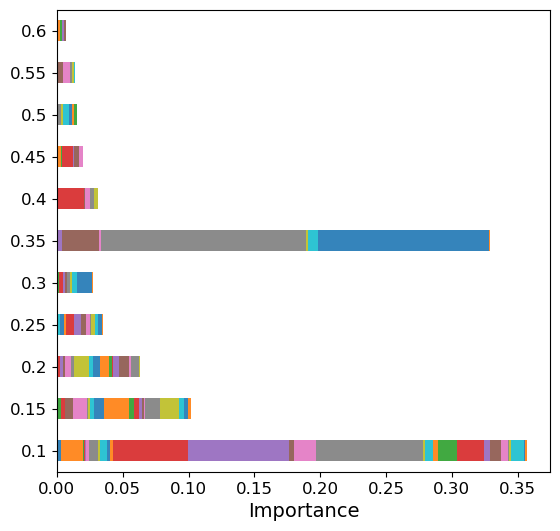

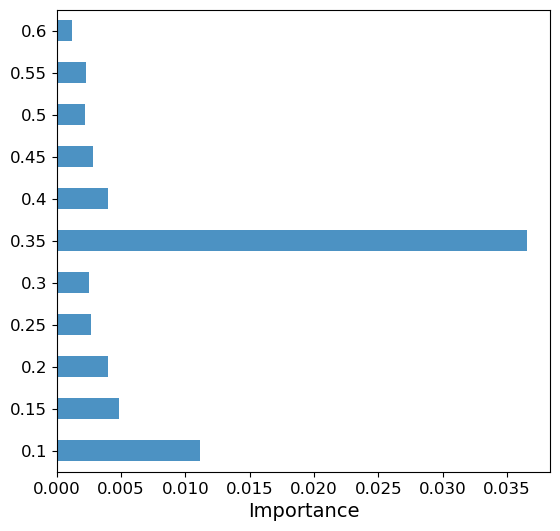

In [353]:
ppp = 'train_model_2_4_0.35.m'
pa = '/Users/renzhe/Desktop/g2/zata_all/model/' + ppp
model_check(path_model=pa)

In [354]:
#最终确定模型为：train_model_2_4_0.35.m

# 优化G2第二步确定。d_ts = 0.35，现在优化zata，选择zata=10 or 50.

In [191]:

data_inf

,Img | Atom,Force
0,0 | 0,0.265362
1,0 | 1,0.339377
2,0 | 2,0.309006
3,0 | 3,0.618771
4,0 | 4,0.521276
...,...,...
112963,1224 | 139,0.672515
112964,1224 | 140,0.729798
112965,1224 | 141,1.130905
112966,1224 | 142,1.540307


In [200]:
# select zata = 10 and 50 at d_ts = 0.35
zata_list = ['zata-1.csv', 'zata-10.csv', 'zata-50.csv', 'zata-100.csv','zata-200.csv', 
             'zata-400.csv', 'zata-600.csv', 'zata-800.csv', 'zata-1000.csv']
pwd_ = '/Users/renzhe/Desktop/g2/zata_all/dataall/'
data_zata_50 = pd.read_csv(pwd_+zata_list[2])
data_inf = data_zata_50.iloc[:,[0,1]]

#======================================================================================
zata = [10, 50]
zata_list = ['zata-10.csv', 'zata-50.csv']
pwd_ = '/Users/renzhe/Desktop/g2/zata_all/dataall/'

l_name = []
for e in zata:
    for i in range(9):
        l_n = '{}_ts_0.35/{}'.format(e,i)
        l_name.append(l_n)

n_ = 95        
data_035 = pd.DataFrame()
for z_l in zata_list:
    path_i = pwd_ + z_l
    df_i = pd.read_csv(path_i)
    d035 = df_i.iloc[:, n_:n_+9]
    data_035 = pd.concat([data_035, d035], axis=1)
    '''
       len(data_035) = 2 + 9 * 2 = 21 (2image序号、Y_label = Force；
       9 * 2是d_ts = 0.35时有9个g2，eta选择10和50共2组)。
    '''
    
data_035.columns = l_name  
data_035 = pd.concat([data_inf, data_035], axis=1)
data_035.to_csv(pwd_+'optimize_zata_035.csv', index=False)

In [201]:
data_035

,Img | Atom,Force,10_ts_0.35/0,10_ts_0.35/1,10_ts_0.35/2,10_ts_0.35/3,10_ts_0.35/4,10_ts_0.35/5,10_ts_0.35/6,10_ts_0.35/7,10_ts_0.35/8,50_ts_0.35/0,50_ts_0.35/1,50_ts_0.35/2,50_ts_0.35/3,50_ts_0.35/4,50_ts_0.35/5,50_ts_0.35/6,50_ts_0.35/7,50_ts_0.35/8
0,0 | 0,0.265362,0.063007,0.054173,0.041865,0.030407,0.028839,0.042485,0.072118,0.094318,0.057394,0.009976,0.090422,0.053207,0.016830,0.012891,0.069585,0.130787,0.016778,1.209444e-04
1,0 | 1,0.339377,0.049705,0.040677,0.030598,0.023177,0.026008,0.041112,0.065864,0.080890,0.048746,0.011830,0.078440,0.036521,0.011468,0.016831,0.074012,0.094699,0.020534,4.698068e-04
2,0 | 2,0.309006,0.059001,0.052671,0.042651,0.033320,0.032610,0.040808,0.053338,0.055709,0.030200,0.007949,0.078709,0.054423,0.018280,0.024733,0.068280,0.047485,0.014586,5.809533e-04
3,0 | 3,0.618771,0.062096,0.053449,0.041578,0.031558,0.032797,0.048256,0.074288,0.088635,0.051472,0.009436,0.088676,0.053038,0.014802,0.022276,0.083392,0.104702,0.017851,1.654170e-04
4,0 | 4,0.521276,0.058341,0.050527,0.039918,0.030977,0.032849,0.048818,0.075301,0.088979,0.050808,0.011320,0.081998,0.050300,0.016150,0.020582,0.087789,0.101092,0.017862,6.061279e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112963,1224 | 139,0.672515,0.163725,0.143065,0.124564,0.111768,0.106103,0.098950,0.089621,0.072363,0.031334,0.050342,0.246921,0.117668,0.102084,0.108941,0.076737,0.068105,0.002538,2.138829e-06
112964,1224 | 140,0.729798,0.172491,0.145446,0.118088,0.099303,0.096635,0.099865,0.095848,0.074815,0.031858,0.049529,0.263611,0.126833,0.060990,0.124010,0.086668,0.060974,0.006466,1.848877e-05
112965,1224 | 141,1.130905,0.145359,0.129330,0.122917,0.120044,0.117271,0.104836,0.083874,0.054467,0.017481,0.159988,0.177040,0.105708,0.132593,0.109484,0.085280,0.024531,0.000335,1.311917e-07
112966,1224 | 142,1.540307,0.175594,0.143301,0.120224,0.112980,0.124847,0.136952,0.126765,0.083565,0.024113,0.086507,0.283614,0.108358,0.082201,0.164121,0.148160,0.024762,0.000166,2.201079e-08


In [202]:
# 2.GBDT for G2_zata
data035_ = pd.read_csv('/Users/renzhe/Desktop/g2/zata_all/dataall/optimize_zata_035.csv')

In [236]:
def GBDT_opt_g2_zata(random_state_1, random_state_2, n_ks_=1000, data035=data035_):
    x1w = data035.drop(['Img   |   Atom', 'Force'], axis=1)
    y1w = data035['Force'].values
    datank = data035.sample(n=n_ks_, replace=False, random_state=random_state_1, axis=0)
    xnk = datank.drop(['Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values
    x_train, x_test, y_train, y_test = train_test_split(xnk,ynk,random_state=random_state_2,train_size=0.99)
    gbr = GradientBoostingRegressor(n_estimators=200, max_depth=8, min_samples_split=3, learning_rate=0.1, loss='squared_error')
    gbr.fit(x_train, y_train.ravel())
    y_gbr = gbr.predict(x_train)
    mse = mean_squared_error(y_train, y_gbr)
    rr = np.sqrt(mse)
    y_gbr1 = gbr.predict(x_test)
    r2 = r2_score(y_test, y_gbr1)
    if r2 > 0.91 and rr < 0.05:
        joblib.dump(gbr, '/Users/renzhe/Desktop/g2/zata_all/model/opt-zata/zata_{}_{}.m'.format(random_state_1, random_state_2))
        print("RMSE:", rr)
        print("  R2:", r2)
        feature_importance = gbr.feature_importances_
        ind_zata = [10, 50]
        df1 = pd.DataFrame(columns=data035.columns[2:], index=ind_zata)
        df1.iloc[0, 0:9]  = feature_importance[0:9]
        df1.iloc[1, 9:18] = feature_importance[9:18]
        df1 = df1.fillna(0)
        a0  = np.sum(feature_importance[0:9])
        a1  = np.sum(feature_importance[9:18])      
    print('Finish random_s1-s2: {}-{}'.format(random_state_1,random_state_2))
    return gbr

In [237]:
for i in range(100):
    for j in range(100):
        GBDT_opt_g2_zata(random_state_1=j, random_state_2=i)

Finish random_s1-s2: 0-0
Finish random_s1-s2: 1-0
Finish random_s1-s2: 2-0
Finish random_s1-s2: 3-0
Finish random_s1-s2: 4-0
Finish random_s1-s2: 5-0
Finish random_s1-s2: 6-0
Finish random_s1-s2: 7-0
Finish random_s1-s2: 8-0
Finish random_s1-s2: 9-0
Finish random_s1-s2: 10-0
Finish random_s1-s2: 11-0
Finish random_s1-s2: 12-0
Finish random_s1-s2: 13-0
Finish random_s1-s2: 14-0
Finish random_s1-s2: 15-0
Finish random_s1-s2: 16-0
Finish random_s1-s2: 17-0
Finish random_s1-s2: 18-0
Finish random_s1-s2: 19-0
Finish random_s1-s2: 20-0
Finish random_s1-s2: 21-0
Finish random_s1-s2: 22-0
Finish random_s1-s2: 23-0
Finish random_s1-s2: 24-0
Finish random_s1-s2: 25-0
Finish random_s1-s2: 26-0
Finish random_s1-s2: 27-0
Finish random_s1-s2: 28-0
Finish random_s1-s2: 29-0
Finish random_s1-s2: 30-0
Finish random_s1-s2: 31-0
Finish random_s1-s2: 32-0
Finish random_s1-s2: 33-0
Finish random_s1-s2: 34-0
Finish random_s1-s2: 35-0
Finish random_s1-s2: 36-0
Finish random_s1-s2: 37-0
Finish random_s1-s2: 3

Finish random_s1-s2: 1-3
Finish random_s1-s2: 2-3
Finish random_s1-s2: 3-3
RMSE: 0.008086642347957966
  R2: 0.9116755950334384
Finish random_s1-s2: 4-3
Finish random_s1-s2: 5-3
Finish random_s1-s2: 6-3
Finish random_s1-s2: 7-3
Finish random_s1-s2: 8-3
Finish random_s1-s2: 9-3
Finish random_s1-s2: 10-3
Finish random_s1-s2: 11-3
Finish random_s1-s2: 12-3
Finish random_s1-s2: 13-3
Finish random_s1-s2: 14-3
Finish random_s1-s2: 15-3
Finish random_s1-s2: 16-3
Finish random_s1-s2: 17-3
Finish random_s1-s2: 18-3
Finish random_s1-s2: 19-3
Finish random_s1-s2: 20-3
Finish random_s1-s2: 21-3
Finish random_s1-s2: 22-3
Finish random_s1-s2: 23-3
Finish random_s1-s2: 24-3
Finish random_s1-s2: 25-3
Finish random_s1-s2: 26-3
Finish random_s1-s2: 27-3
Finish random_s1-s2: 28-3
Finish random_s1-s2: 29-3
Finish random_s1-s2: 30-3
Finish random_s1-s2: 31-3
Finish random_s1-s2: 32-3
Finish random_s1-s2: 33-3
Finish random_s1-s2: 34-3
Finish random_s1-s2: 35-3
Finish random_s1-s2: 36-3
Finish random_s1-s2: 

Finish random_s1-s2: 94-5
Finish random_s1-s2: 95-5
Finish random_s1-s2: 96-5
Finish random_s1-s2: 97-5
Finish random_s1-s2: 98-5
Finish random_s1-s2: 99-5
Finish random_s1-s2: 0-6
Finish random_s1-s2: 1-6
Finish random_s1-s2: 2-6
Finish random_s1-s2: 3-6
Finish random_s1-s2: 4-6
Finish random_s1-s2: 5-6
Finish random_s1-s2: 6-6
Finish random_s1-s2: 7-6
Finish random_s1-s2: 8-6
Finish random_s1-s2: 9-6
Finish random_s1-s2: 10-6
Finish random_s1-s2: 11-6
Finish random_s1-s2: 12-6
Finish random_s1-s2: 13-6
Finish random_s1-s2: 14-6
Finish random_s1-s2: 15-6
Finish random_s1-s2: 16-6
Finish random_s1-s2: 17-6
Finish random_s1-s2: 18-6
Finish random_s1-s2: 19-6
Finish random_s1-s2: 20-6
Finish random_s1-s2: 21-6
Finish random_s1-s2: 22-6
Finish random_s1-s2: 23-6
Finish random_s1-s2: 24-6
Finish random_s1-s2: 25-6
Finish random_s1-s2: 26-6
Finish random_s1-s2: 27-6
Finish random_s1-s2: 28-6
Finish random_s1-s2: 29-6
Finish random_s1-s2: 30-6
Finish random_s1-s2: 31-6
Finish random_s1-s2: 3

Finish random_s1-s2: 98-8
Finish random_s1-s2: 99-8
Finish random_s1-s2: 0-9
Finish random_s1-s2: 1-9
Finish random_s1-s2: 2-9
Finish random_s1-s2: 3-9
Finish random_s1-s2: 4-9
Finish random_s1-s2: 5-9
Finish random_s1-s2: 6-9
Finish random_s1-s2: 7-9
Finish random_s1-s2: 8-9
Finish random_s1-s2: 9-9
Finish random_s1-s2: 10-9
Finish random_s1-s2: 11-9
Finish random_s1-s2: 12-9
Finish random_s1-s2: 13-9
Finish random_s1-s2: 14-9
Finish random_s1-s2: 15-9
Finish random_s1-s2: 16-9
Finish random_s1-s2: 17-9
Finish random_s1-s2: 18-9
Finish random_s1-s2: 19-9
Finish random_s1-s2: 20-9
Finish random_s1-s2: 21-9
Finish random_s1-s2: 22-9
Finish random_s1-s2: 23-9
Finish random_s1-s2: 24-9
Finish random_s1-s2: 25-9
Finish random_s1-s2: 26-9
Finish random_s1-s2: 27-9
Finish random_s1-s2: 28-9
Finish random_s1-s2: 29-9
Finish random_s1-s2: 30-9
Finish random_s1-s2: 31-9
Finish random_s1-s2: 32-9
Finish random_s1-s2: 33-9
Finish random_s1-s2: 34-9
Finish random_s1-s2: 35-9
Finish random_s1-s2: 3

KeyboardInterrupt: 

In [244]:
#important 分析
import os
def list_files_in_folder(folder_path='/Users/renzhe/Desktop/g2/zata_all/model/opt-zata'):
    l_ = []
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            l_.append(file_path)
    return l_


def im_a(path_s1_s2):
    gbr_035 = joblib.load(path_s1_s2)
    feature_importance = gbr_035.feature_importances_
    ind_zata = [10, 50]
    df1 = pd.DataFrame(columns=data035_.columns[2:], index=ind_zata)
    df1.iloc[0, 0:9]  = feature_importance[0:9]
    df1.iloc[1, 9:18] = feature_importance[9:18]
    df1 = df1.fillna(0)
    a0  = np.sum(feature_importance[0:9])
    a1  = np.sum(feature_importance[9:18])
    feature_importance = gbr_035.feature_importances_
    aa = np.reshape(feature_importance, (2, 9))
    dd = pd.DataFrame(aa, index=[10, 50], columns=range(9))
    nn = np.argmax(aa, axis=0)
    return nn

In [249]:
model_all = list_files_in_folder()

dic_ = {}
for pa in model_all:
    nn_ = im_a(path_s1_s2=pa)
    dic_[pa[54:]] = nn_

In [250]:
dic_

{'78_3.m': array([1, 1, 1, 1, 1, 0, 1, 1, 1]),
 '65_8.m': array([0, 0, 0, 0, 1, 1, 0, 1, 1]),
 '90_9.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '66_2.m': array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
 '47_3.m': array([1, 0, 0, 1, 1, 1, 1, 1, 0]),
 '85_3.m': array([1, 0, 0, 1, 1, 1, 0, 1, 1]),
 '67_2.m': array([1, 1, 0, 1, 1, 1, 0, 1, 1]),
 '80_3.m': array([1, 0, 1, 0, 1, 0, 1, 1, 0]),
 '28_1.m': array([1, 0, 0, 1, 1, 0, 1, 1, 1]),
 '48_6.m': array([0, 1, 0, 1, 1, 0, 1, 1, 0]),
 '41_9.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '60_8.m': array([1, 0, 1, 1, 1, 1, 0, 1, 0]),
 '5_4.m': array([1, 0, 0, 1, 1, 1, 1, 1, 0]),
 '63_6.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '91_4.m': array([1, 1, 0, 1, 1, 0, 1, 1, 1]),
 '85_0.m': array([1, 0, 0, 1, 1, 1, 0, 1, 1]),
 '33_7.m': array([0, 1, 1, 1, 1, 0, 1, 1, 1]),
 '4_3.m': array([1, 0, 0, 0, 1, 1, 1, 1, 0]),
 '74_4.m': array([0, 0, 1, 1, 1, 1, 0, 1, 0]),
 '60_4.m': array([1, 0, 1, 1, 1, 1, 1, 1, 0]),
 '95_1.m': array([0, 0, 1, 1, 1, 1, 1, 1, 1]),
 '63_4.m': arra

In [ ]:
# path = /work/mse-minzw/lrz/g1/g2/zata_thetas/zata-035
'''
 '78_3.m': array([1, 1, 1, 1, 1, 0, 1, 1, 1]),
 '65_8.m': array([0, 0, 0, 0, 1, 1, 0, 1, 1]),
 '90_9.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '66_2.m': array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
 '47_3.m': array([1, 0, 0, 1, 1, 1, 1, 1, 0]),
 '85_3.m': array([1, 0, 0, 1, 1, 1, 0, 1, 1]),--recal2
 '67_2.m': array([1, 1, 0, 1, 1, 1, 0, 1, 1]),
 '80_3.m': array([1, 0, 1, 0, 1, 0, 1, 1, 0]),--recal3
 '28_1.m': array([1, 0, 0, 1, 1, 0, 1, 1, 1]),
 '48_6.m': array([0, 1, 0, 1, 1, 0, 1, 1, 0]),
 '41_9.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '60_8.m': array([1, 0, 1, 1, 1, 1, 0, 1, 0]),--recal1
 '5_4.m':  array([1, 0, 0, 1, 1, 1, 1, 1, 0]),
 '63_6.m': array([1, 0, 1, 0, 1, 1, 1, 1, 1]),
 '91_4.m': array([1, 1, 0, 1, 1, 0, 1, 1, 1]),
 '85_0.m': array([1, 0, 0, 1, 1, 1, 0, 1, 1]),--recal2
 '33_7.m': array([0, 1, 1, 1, 1, 0, 1, 1, 1]),
 '4_3.m':  array([1, 0, 0, 0, 1, 1, 1, 1, 0]),--recal4
 '74_4.m': array([0, 0, 1, 1, 1, 1, 0, 1, 0]),--recal5
 '60_4.m': array([1, 0, 1, 1, 1, 1, 1, 1, 0]),
 '95_1.m': array([0, 0, 1, 1, 1, 1, 1, 1, 1]),
 '63_4.m': array([1, 0, 1, 1, 1, 1, 1, 1, 1]),
 '43_5.m': array([0, 0, 0, 1, 1, 1, 0, 1, 1]),
 '48_0.m': array([1, 0, 0, 1, 1, 0, 1, 1, 0]),
 '93_2.m': array([0, 1, 1, 1, 1, 1, 1, 1, 1]),
 '86_8.m': array([1, 0, 0, 1, 1, 1, 1, 1, 1]),
 '20_1.m': array([1, 0, 0, 1, 1, 1, 1, 1, 0]),
 '60_9.m': array([1, 0, 1, 1, 1, 1, 0, 1, 0]),--recal1
 '48_9.m': array([1, 0, 1, 1, 1, 0, 1, 1, 0]),
 '60_3.m': array([1, 0, 1, 1, 1, 1, 0, 1, 0]),--recal1
 '97_8.m': array([1, 1, 1, 1, 1, 0, 1, 1, 0])
 
 '''

In [264]:
# for i in range(1,6):
#     print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/zata-035/recal{}'.format(i))
#     print('mkdir recal1')
#     print('cd recal1')
#     print('cp ../* .')
#     print('bsub < run-pyamff.sh')
#     print('  ')

In [263]:
# # for i in range(1,6):
#     print('cd /work/mse-minzw/lrz/g1/g2/zata_thetas/zata-035/recal{}'.format(i))
#     print('bsub < run-pred.sh')
#     print('  ')

In [265]:
#最终选择 recal3-'80_3'
#array([1, 0, 1, 0, 1, 0, 1, 1, 0]),
#即【50, 10, 50, 10, 50, 10, 50, 50, 10】

In [363]:
# a.orgin画图importance——d_ts
mo = joblib.load('/Users/renzhe/Desktop/g2/zata_all/model/train_model_2_4_0.35.m')
feature_importance = mo.feature_importances_
fps_num = [32, 21, 16, 13, 11, 9, 8, 7, 7, 6, 6] # sum(fps_num) = 136
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
df1 = pd.DataFrame(columns=range(32), index=d_thetas)
df1.iloc[0, 0:32] = feature_importance[0:32]
df1.iloc[1, 0:21] = feature_importance[32:53]
df1.iloc[2, 0:16] = feature_importance[53:69]
df1.iloc[3, 0:13] = feature_importance[69:82]
df1.iloc[4, 0:11] = feature_importance[82:93]
df1.iloc[5, 0:9] = feature_importance[93:102]
df1.iloc[6, 0:8] = feature_importance[102:110]
df1.iloc[7, 0:7] = feature_importance[110:117]
df1.iloc[8, 0:7] = feature_importance[117:124]
df1.iloc[9, 0:6] = feature_importance[124:130]
df1.iloc[10, 0:6] = feature_importance[130:136]
df1.to_csv('/Users/renzhe/Desktop/g2/zata_all/dataall/im_d_ts.csv')

# average feature_importance
feature_importance = mo.feature_importances_      
df1a = pd.DataFrame(columns=['ave'], index=d_thetas)
df1a.iloc[0, 0] = np.sum(feature_importance[0:32]) / fps_num[0] 
df1a.iloc[1, 0] = np.sum(feature_importance[32:53]) / fps_num[1]
df1a.iloc[2, 0] = np.sum(feature_importance[53:69]) / fps_num[2]
df1a.iloc[3, 0] = np.sum(feature_importance[69:82]) / fps_num[3]
df1a.iloc[4, 0] = np.sum(feature_importance[82:93]) / fps_num[4]
df1a.iloc[5, 0] = np.sum(feature_importance[93:102]) / fps_num[5]
df1a.iloc[6, 0] = np.sum(feature_importance[102:110]) / fps_num[6]
df1a.iloc[7, 0] = np.sum(feature_importance[110:117]) / fps_num[7]
df1a.iloc[8, 0] = np.sum(feature_importance[117:124]) / fps_num[8]
df1a.iloc[9, 0] = np.sum(feature_importance[124:130]) / fps_num[9]
df1a.iloc[10, 0] = np.sum(feature_importance[130:136]) / fps_num[10]
df1a.to_csv('/Users/renzhe/Desktop/g2/zata_all/dataall/im_d_ts_ave.csv')


In [279]:
# b.orgin画图importance——zata
gbr_035 = joblib.load('/Users/renzhe/Desktop/g2/zata_all/model/opt-zata/zata_80_3.m')
feature_importance = gbr_035.feature_importances_
df1 = pd.DataFrame(columns=range(9), index=[10, 50])
df1.iloc[0, 0:9] = feature_importance[0:9]
df1.iloc[1, 0:9] = feature_importance[9:18]
df1.to_csv('/Users/renzhe/Desktop/g2/zata_all/dataall/im_zata.csv')

In [ ]:
# grid-search for g2-eta-d_ts.

In [268]:
# 1.finish the fpParas.dat all.
eta_all = [0, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10] # 10
d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6] # 11
ori_path = '/Users/renzhe/Desktop/g2/zata_all/eta-all/fpParas_old.dat'

for eta in eta_all:
    for ts in d_thetas:
        new_path = '/Users/renzhe/Desktop/g2/zata_all/eta-all/fps_all/{}-{}.dat'.format(eta,ts)
        with open(new_path, 'w') as file_object:
            # 1.write G1 and change G2_number.
            f_old = open(ori_path,'r')
            code = []
            for line in f_old:
                code.append(line)  
            t_i = np.arange(0,np.pi,ts)
            code[6] = '9 {}\n'.format(len(t_i))
            for line_ in code:    
                file_object.write(line_)
            # 2. write G2.
            num_ = 0
            for t_ii in t_i:
                if num_ == len(t_i) - 1:
                    file_object.write('G2      Ge       Ge       Ge     {}     50     1.00     {}   5.7'.
                                  format(eta,np.round(t_ii,3)))
                else:
                    file_object.write('G2      Ge       Ge       Ge     {}     50     1.00     {}   5.7\n'.
                                  format(eta,np.round(t_ii,3)))
                num_ += 1
        file_object.close()
print('Finish') 

Finish


In [282]:
# # 2.撒点作业
# eta_all = [0, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10] # 10
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6] # 11

# for eta in eta_all:
#     for ts in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}-{}'.format(eta, ts))
#         print('cp /work/mse-minzw/lrz/g1/g2/eta_thetas/data_all/fpsall/{}-{}.dat .'.format(eta, ts))
#         print('mv {}-{}.dat fpParas.dat'.format(eta, ts))
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/100-0.1/config.ini .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/100-0.1/pred.py .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/100-0.1/run-pred.sh .')
#         print('cp /work/mse-minzw/lrz/g1/g2/zata_thetas/100-0.1/run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')

In [365]:
# # 2.撒点作业
# eta_all = [0, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10] # 10
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6] # 11

# for eta in eta_all:
#     for ts in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}-{}'.format(eta, ts))
#         print('bsub < run-pred.sh')
#         print('  ')


In [ ]:
# 3. g2_map_opt

# firstly: def function to statistic RMSE in recal file.

import io
import os
import re
import shutil
import numpy as np
import pandas as pd

def recal_RMSE(R_num):
    index_ = []
    recal_num = R_num
    path0 = '/work/mse-minzw/lrz/g1/g2/zata_thetas/'
    num_zeta = [0, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10] # 10
    num_thetas = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6] # 9个
    for zeta in num_zeta:
        for ts in num_thetas:
            path_recal = 'recal{}'.format(recal_num)
            path_zata_ts = '/work/mse-minzw/lrz/g1/g2/eta_thetas/{}-{}'.format(zeta, ts)
            if os.path.exists(os.path.join(path_zata_ts, path_recal)):
                index_.append('{}-{}'.format(zeta, ts))                    
    df_ef_opt = pd.DataFrame(index=index_, columns=['te','tf','pe','pf'])            
    for p_recal in index_:
        path_prl = path0 + p_recal + '/recal{}'.format(recal_num) + '/pred.log'
        path_lrz = path0 + p_recal + '/recal{}'.format(recal_num) + '/pyamff.log'
        file = open(path_lrz)
        out = file.readlines()
        rmse = out[-1]
        num_list = rmse.split()
        ForceRMSE = float(num_list[-1])
        EnergyRMSE = float(num_list[-2])
        df_ef_opt.loc['{}'.format(p_recal), 'tf'] = ForceRMSE
        df_ef_opt.loc['{}'.format(p_recal), 'te'] = EnergyRMSE
        print('Finish Training ', '{}'.format(p_recal)) 
        
        pfile = open(path_prl)
        outp = pfile.readlines()
        rmsep = outp[-36]
        pattern = r'[\d.]+'
        number = re.findall(pattern, rmsep)
        ForceRMSE_str = number[1]
        EnergyRMSE_str = number[0]
        ForceRMSEp = float(ForceRMSE_str)
        EnergyRMSEp = float(EnergyRMSE_str)
        df_ef_opt.loc['{}'.format(p_recal), 'pf'] = ForceRMSEp
        df_ef_opt.loc['{}'.format(p_recal), 'pe'] = EnergyRMSEp
        print('Finish Prediction ', '{}'.format(p_recal))  
        
    with pd.ExcelWriter('./g2_eta_map_opt_recal{}.xlsx'.format(recal_num)) as writer1:
        df_ef_opt.to_excel(writer1, sheet_name='g2_eta_opt_recal{}'.format(recal_num))


recal_RMSE(R_num=1)


In [3]:
# # recal0
# eta_all = [0, 0.001, 0.01, 0.1] # 10
# d_thetas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6] # 11

# for eta in eta_all:
#     for ts in d_thetas:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}-{}/recal0'.format(eta, ts))
#         print('bsub < run-pred.sh')
#         print('  ')

In [2]:
# # recal-opt
# # 3.1 g2_eta_map_opt_recal1
# import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}-{}'.format(data_p_f.iloc[i,0],data_p_f.iloc[i,1]))
#         print('mkdir recal1')
#         print('cd recal1')
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')
        
# # #recal-opt
# ##3.1 g2_eta_map_opt_recal1
# import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal1'.format(data_p_f.iloc[i,2]))
#         print('bsub < run-pred.sh')
#         print('  ')


In [393]:
# # recal-opt
# # 3.1 g2_eta_map_opt_recal1
# rere = 2
# import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.13:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')

# rere = 2
# # #recal-opt
# ##3.1 g2_eta_map_opt_recal1
# import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.13:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [392]:
# recal-opt
# 3.1 g2_eta_map_opt_recal3
rere = 3


# import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')



# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [401]:
# recal-opt
# 3.1 g2_eta_map_opt_recal4
rere = 4
import pandas as pd
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt').iloc[0:55,:]
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.088:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')


# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.088:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [406]:
# recal-opt
# 3.1 g2_eta_map_opt_recal4
rere = 5
import pandas as pd
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.125:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')


# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.125:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [410]:
# recal-opt
# 3.1 g2_eta_map_opt_recal4
rere = 6
import pandas as pd
# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a < a_ and a < _a:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i-1,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')

#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i+1,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')
        
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a < a_ and a < _a:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i-1,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')

#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i+1,2], rere))
#         print('bsub < run-pred.sh')

In [414]:
# recal-opt
# 3.1 g2_eta_map_opt_recal4
rere = 7
import pandas as pd
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.12:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')


# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.12:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [1]:
# recal-opt
# 3.1 g2_eta_map_opt_recal3
rere = 8


import pandas as pd
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')



# data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if (_a<a) and (a_<a):
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [419]:
# recal-opt
# 3.1 g2_eta_map_opt_recal4
rere = 9
import pandas as pd
data_p_f = pd.read_excel('/Users/renzhe/Desktop/g2/g2_eta_map_opt.xlsx',sheet_name='g2_opt')
# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.1:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}'.format(data_p_f.iloc[i,2]))
#         print('mkdir recal{}'.format(rere))
#         print('cd recal{}'.format(rere))
#         print('cp ../pred.py .')
#         print('cp ../config.ini .')
#         print('cp ../fpParas.dat .')
#         print('cp ../run-pred.sh .')
#         print('cp ../run-pyamff.sh .')
#         print('bsub < run-pyamff.sh')
#         print('  ')


# for i in range(1,len(data_p_f)-1):
#     _a = data_p_f.iloc[i-1,-1]
#     a  = data_p_f.iloc[i+0,-1]
#     a_ = data_p_f.iloc[i+1,-1]
#     if a > 0.1:
#         print('cd /work/mse-minzw/lrz/g1/g2/eta_thetas/{}/recal{}'.format(data_p_f.iloc[i,2], rere))
#         print('bsub < run-pred.sh')
#         print('  ')


In [435]:
from ase.visualize import view

In [436]:
zcdtest = Trajectory('/Users/renzhe/Desktop/Ge_test.traj')
zcdtrain = Trajectory('/Users/renzhe/Desktop/Ge_training.traj')

In [437]:
view(zcdtest)

<Popen: returncode: None args: ['/Users/renzhe/anaconda3/bin/python', '-m', ...>

In [439]:
view(zcdtrain)

<Popen: returncode: None args: ['/Users/renzhe/anaconda3/bin/python', '-m', ...>